## **1. Business Understanding**
### **Objective**
The primary goal of this analysis is to examine trends in ginger exports (`Exports`) using historical data and their relationship with search indices (`Web`, `YouTube`, `Images`, and `News`). Additionally, the analysis will:
- Uncover seasonal trends in ginger exports.
- Explore how online search behaviors relate to export quantities.
- Find the best model.


### **Key Business Questions**
1. Is there evidence of seasonality in ginger exports?
2. Can `Web`, `YouTube`, `Images` and `News` improve the accuracy of a model using only lags.
3. Which is the best model?

## **2. Data Understanding**

In this phase, we explore and preprocess the dataset to gain a better understanding of its structure, content, and potential issues. This includes:
- Analyzing the dataset structure and summary statistics.
- Checking for missing and unique values.
- Visualizing key variables to identify patterns and trends.


In [9]:
import pandas as pd

# Load the file
file_path = 'data/gingerperu2.xlsx'
gingerperu = pd.read_excel(file_path)

# Exploratory analysis
gingerperu_info = gingerperu.info()

# Descriptive statistics
gingerperu_stats = gingerperu.describe()

# Check for missing and unique values
missing_values = gingerperu.isnull().sum()
unique_values = gingerperu.nunique()

# Create a summary of the variables
summary = pd.DataFrame({
    "Variable Type": gingerperu.dtypes,
    "Unique Values": unique_values,
    "Missing Values": missing_values,
    "Mean": gingerperu.mean(numeric_only=True),
    "Median": gingerperu.median(numeric_only=True),
    "Minimum": gingerperu.min(numeric_only=True),
    "Maximum": gingerperu.max(numeric_only=True)
}).fillna("-")  # Fill missing values for text

print(summary)

# Change months to English names
month_mapping = {
    "M01": "January", "M02": "February", "M03": "March",
    "M04": "April", "M05": "May", "M06": "June",
    "M07": "July", "M08": "August", "M09": "September",
    "M10": "October", "M11": "November", "M12": "December"
}

gingerperu['Month'] = gingerperu['Month'].map(month_mapping)

# Verify the changes
print(gingerperu[['Month']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       132 non-null    int64 
 1   Month      132 non-null    object
 2   Exports    132 non-null    int64 
 3   Exports12  132 non-null    int64 
 4   Web        132 non-null    int64 
 5   YouTube    132 non-null    int64 
 6   Images     132 non-null    int64 
 7   News       132 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.4+ KB
          Variable Type  Unique Values  Missing Values            Mean  \
Exports           int64            132               0  2598704.454545   
Exports12         int64            132               0  2058781.015152   
Images            int64             37               0       23.409091   
Month            object             12               0               -   
News              int64             34               0        18.69697   
Web         

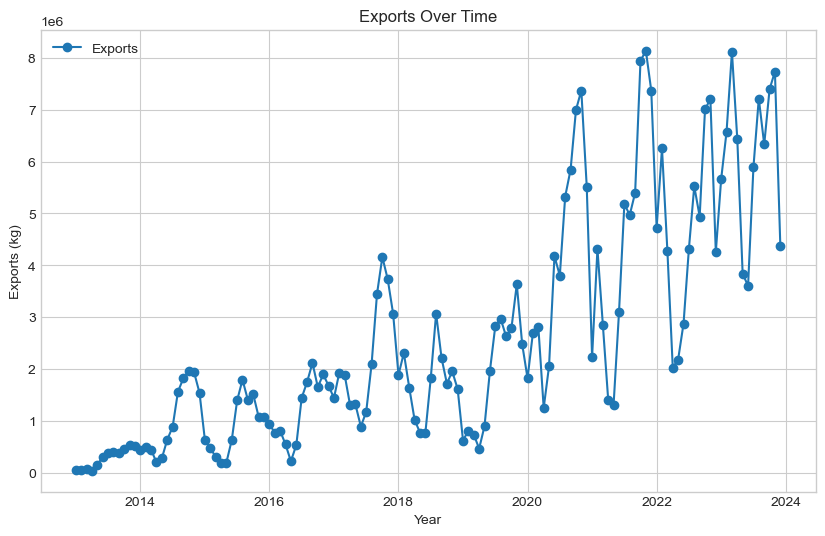

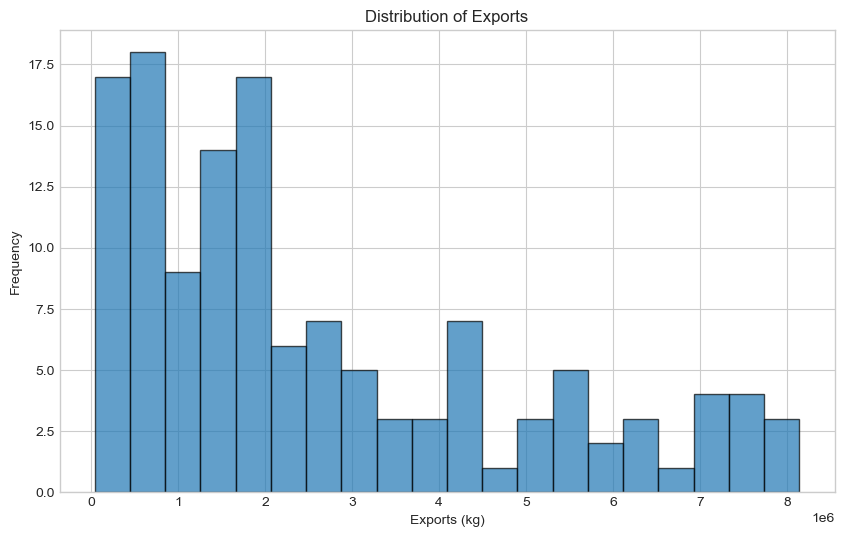

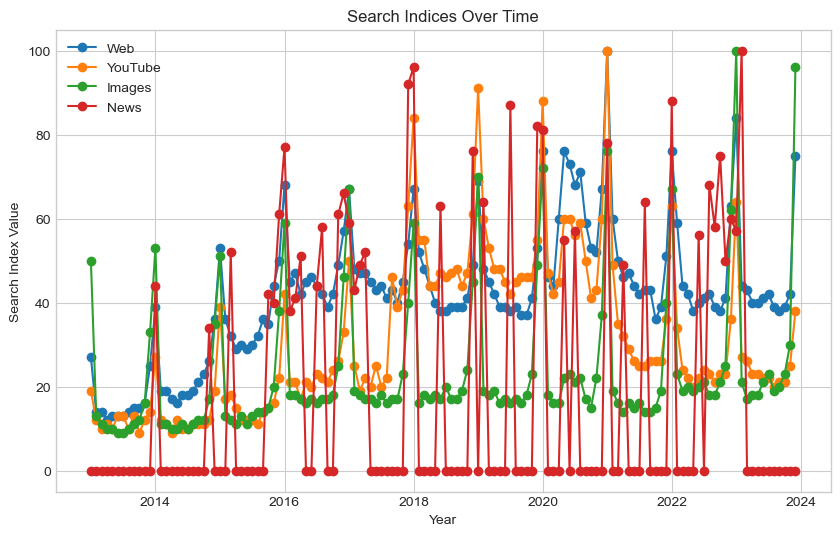

In [10]:
import matplotlib.pyplot as plt

# Set style for plots (updated naming for deprecated style)
plt.style.use('seaborn-v0_8-whitegrid')  # Updated to avoid the deprecation warning

# Plot 1: Exports over time
plt.figure(figsize=(10, 6))
plt.plot(gingerperu['Year'] + (gingerperu['Month'].map({
    "January": 0.0, "February": 0.083, "March": 0.167,
    "April": 0.25, "May": 0.333, "June": 0.417,
    "July": 0.5, "August": 0.583, "September": 0.667,
    "October": 0.75, "November": 0.833, "December": 0.917
})), gingerperu['Exports'], marker='o', label='Exports')
plt.title('Exports Over Time')
plt.xlabel('Year')
plt.ylabel('Exports (kg)')
plt.legend()
plt.show()

# Plot 2: Distribution of Exports
plt.figure(figsize=(10, 6))
plt.hist(gingerperu['Exports'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Exports')
plt.xlabel('Exports (kg)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Search Indices over time
indices = ['Web', 'YouTube', 'Images', 'News']
plt.figure(figsize=(10, 6))
for index in indices:
    plt.plot(gingerperu['Year'] + (gingerperu['Month'].map({
        "January": 0.0, "February": 0.083, "March": 0.167,
        "April": 0.25, "May": 0.333, "June": 0.417,
        "July": 0.5, "August": 0.583, "September": 0.667,
        "October": 0.75, "November": 0.833, "December": 0.917
    })), gingerperu[index], marker='o', label=index)
plt.title('Search Indices Over Time')
plt.xlabel('Year')
plt.ylabel('Search Index Value')
plt.legend()
plt.show()


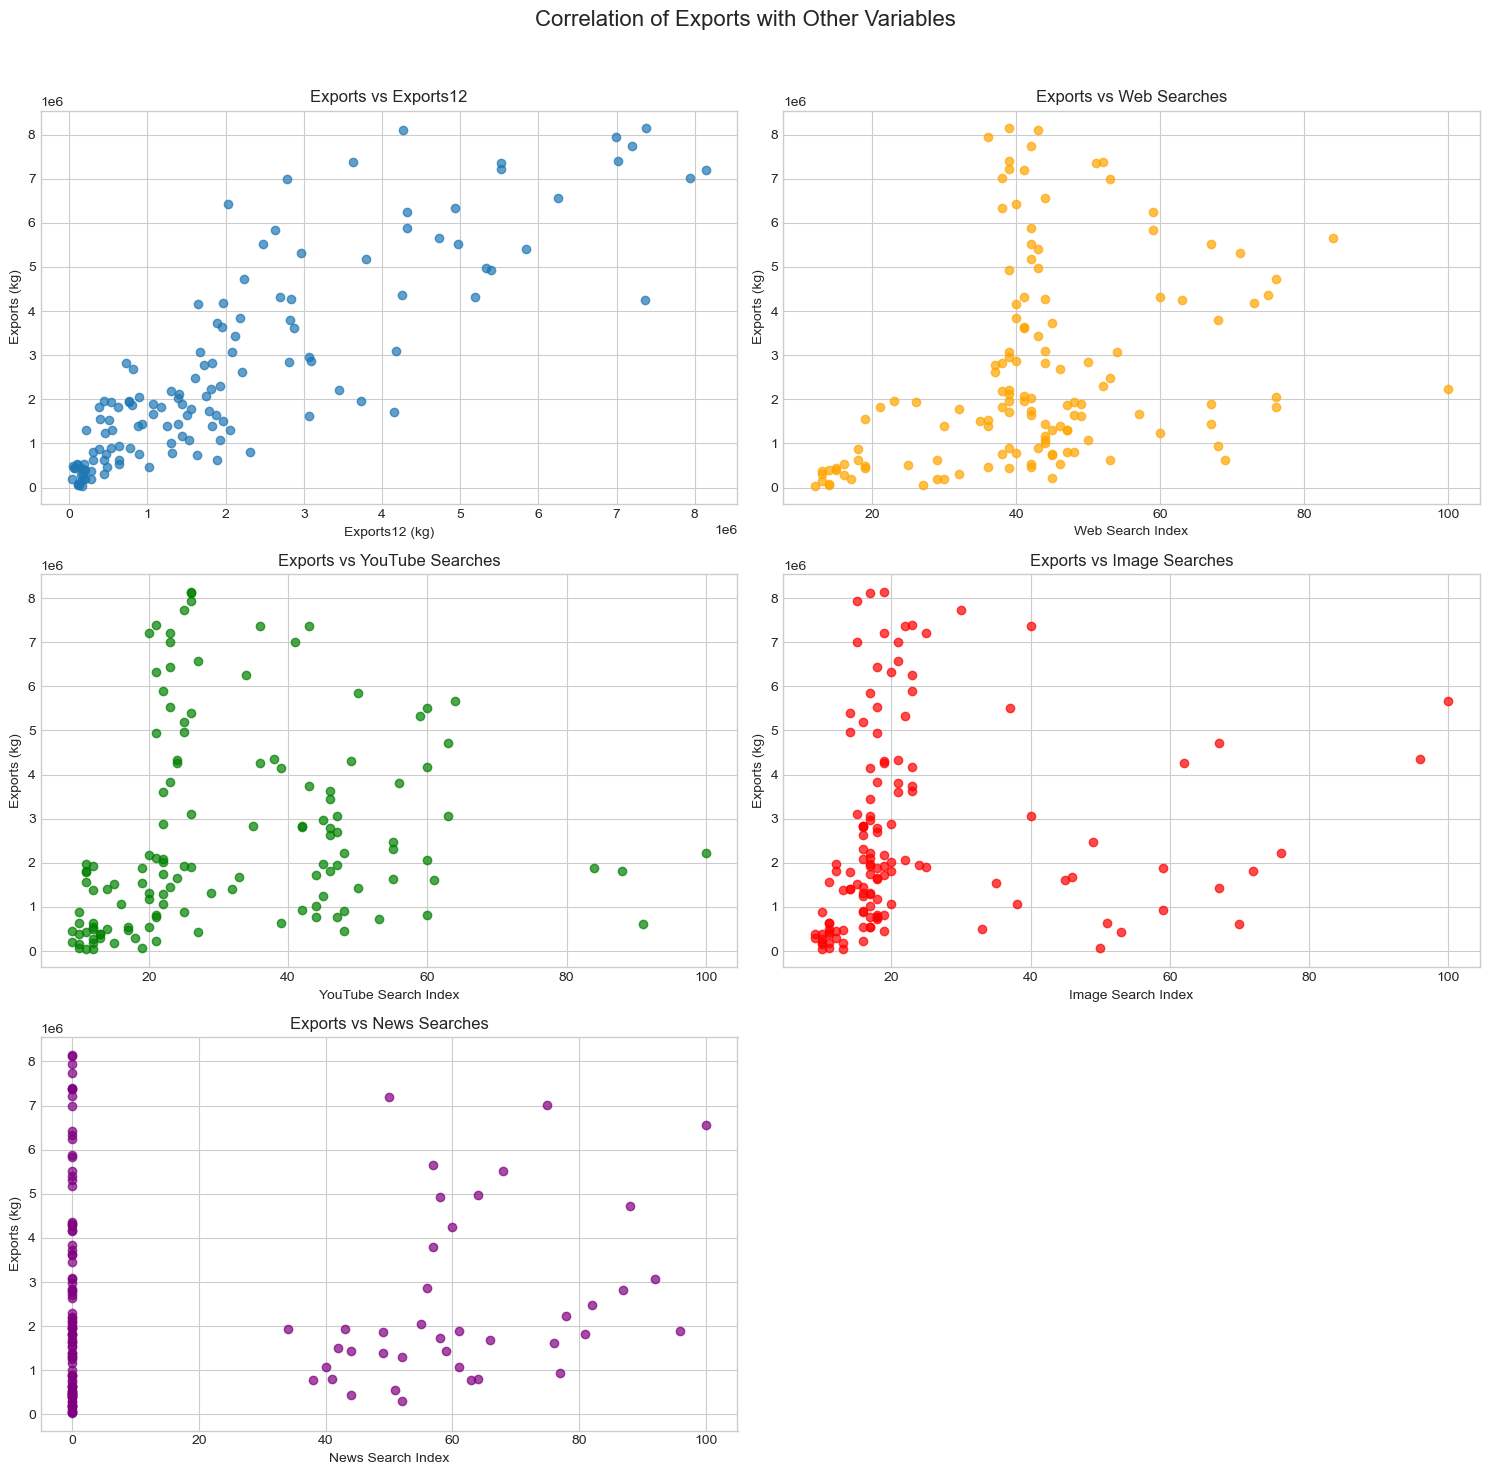

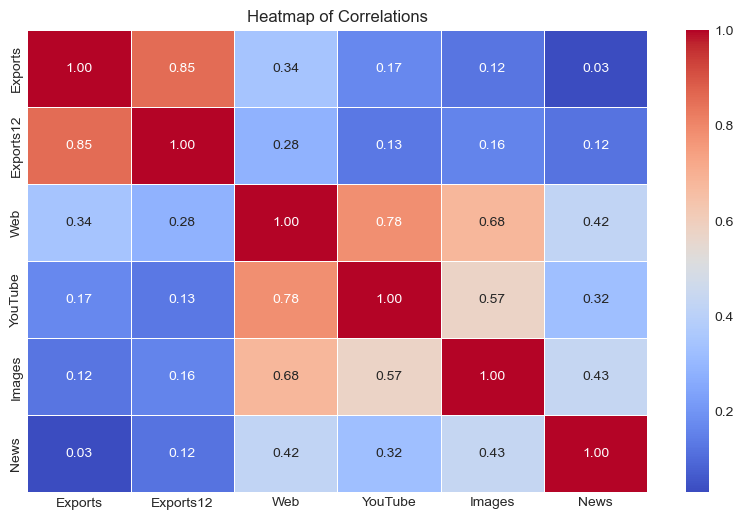

In [11]:

import seaborn as sns

# Create subplots for correlations
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Correlation of Exports with Other Variables', fontsize=16)

# Subplot 1: Exports vs Exports12
axs[0, 0].scatter(gingerperu['Exports12'], gingerperu['Exports'], alpha=0.7)
axs[0, 0].set_title('Exports vs Exports12')
axs[0, 0].set_xlabel('Exports12 (kg)')
axs[0, 0].set_ylabel('Exports (kg)')

# Subplot 2: Exports vs Google
axs[0, 1].scatter(gingerperu['Web'], gingerperu['Exports'], alpha=0.7, color='orange')
axs[0, 1].set_title('Exports vs Web Searches')
axs[0, 1].set_xlabel('Web Search Index')
axs[0, 1].set_ylabel('Exports (kg)')

# Subplot 3: Exports vs YouTube
axs[1, 0].scatter(gingerperu['YouTube'], gingerperu['Exports'], alpha=0.7, color='green')
axs[1, 0].set_title('Exports vs YouTube Searches')
axs[1, 0].set_xlabel('YouTube Search Index')
axs[1, 0].set_ylabel('Exports (kg)')

# Subplot 4: Exports vs Images
axs[1, 1].scatter(gingerperu['Images'], gingerperu['Exports'], alpha=0.7, color='red')
axs[1, 1].set_title('Exports vs Image Searches')
axs[1, 1].set_xlabel('Image Search Index')
axs[1, 1].set_ylabel('Exports (kg)')

# Subplot 5: Exports vs News
axs[2, 0].scatter(gingerperu['News'], gingerperu['Exports'], alpha=0.7, color='purple')
axs[2, 0].set_title('Exports vs News Searches')
axs[2, 0].set_xlabel('News Search Index')
axs[2, 0].set_ylabel('Exports (kg)')

# Remove the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Heatmap of correlations
plt.figure(figsize=(10, 6))
correlation_matrix = gingerperu.drop(columns=['Year']).corr(numeric_only=True)  # Exclude 'Year'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()


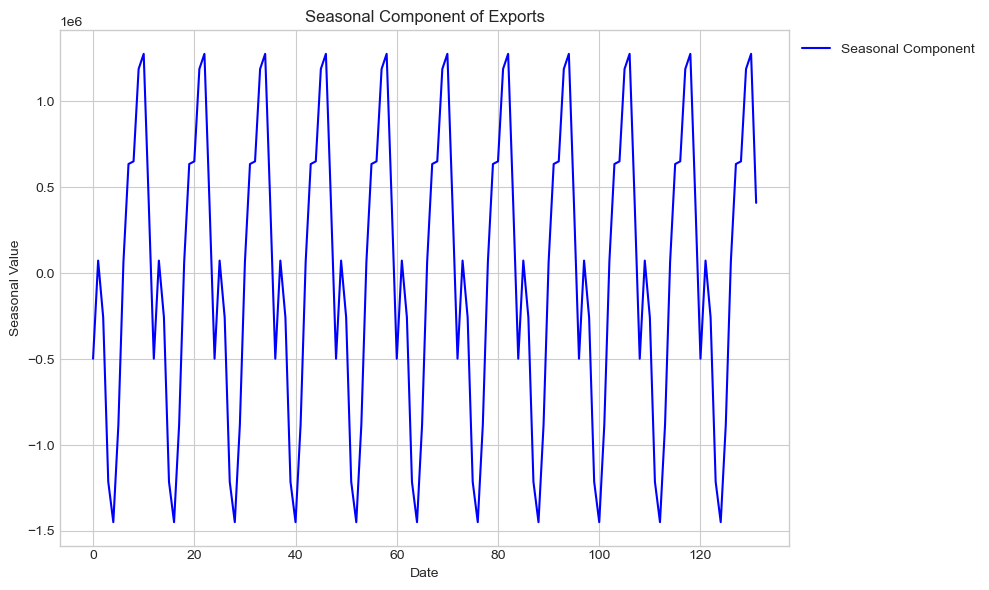

Seasonality detected: True


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Ensure missing values in 'Exports' are handled
gingerperu['Exports'] = gingerperu['Exports'].fillna(method='ffill')

# Perform seasonal decomposition
result = seasonal_decompose(gingerperu['Exports'], model='additive', period=12)

# Test for seasonality: Compare variance of seasonal component to residuals
seasonality_detected = np.var(result.seasonal) > np.var(result.resid)

# Visualize the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(result.seasonal, label='Seasonal Component', color='blue')
plt.title('Seasonal Component of Exports')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

# Output the result for seasonality detection
print("Seasonality detected:", seasonality_detected)


## **3. Data Preparation**


The dataset has been reviewed and is ready for modeling. Below are the key observations:

---

###  **3.1 Data Quality**
- **No Missing Values**: All columns contain complete data, ensuring no imputation or cleaning is required for missing values.
- **Sufficient Variability**: Key variables, including `Exports`, `Exports12`, and Google Trends indicators (`Web`, `YouTube`, `Images`, `News`), display sufficient variability to support robust modeling.

---

###  **3.2 Current Readiness**
- The dataset meets the necessary quality standards for executing regression models, including:
  - Linear Regression
  - Lasso Regression
  - Ridge Regression
  - ElasticNet
  - Randomo Forest
  - Gradient Boosting
  - XGBoost
  - CatBoost
  
  
- All features are correctly formatted, and lagged export values (`Exports12`) are aligned with the target variable (`Exports`).

## **4. Modeling**
In this phase, we develop and evaluate statistical and machine learning models to predict ginger exports. The models use lagged export values (`Exports12`) as a baseline predictor, and we incrementally add online search indices (`Web`, `YouTube`, `Images`, and `News`) to evaluate their contribution to predictive performance. 

---

### **4.1 Baseline Model: Pure Statistical Regression**
We start with a simple linear regression model that uses only the lagged export variable (`Exports12`) as a predictor. This model serves as a baseline for comparison with more complex models.


---

### **4.2 Use of machine learning with different models **
Use of multiple linear regression models, lasso and ridge. We're going to use Gaussian noise because it helps prevent overfitting by introducing variability, making models more robust to new, unseen data.

In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the dataset
X_baseline = gingerperu[['Exports12']]  # Predictor
y = gingerperu['Exports']  # Target

# Fit the regression model
baseline_model = LinearRegression()
baseline_model.fit(X_baseline, y)

# Predict on the entire dataset
y_pred_baseline = baseline_model.predict(X_baseline)

# Calculate R-squared
r2_baseline = r2_score(y, y_pred_baseline)

# Print results
print("Pure Linear Regression Model:")
print(f"R-squared: {r2_baseline:.4f}")


Pure Linear Regression Model:
R-squared: 0.7276


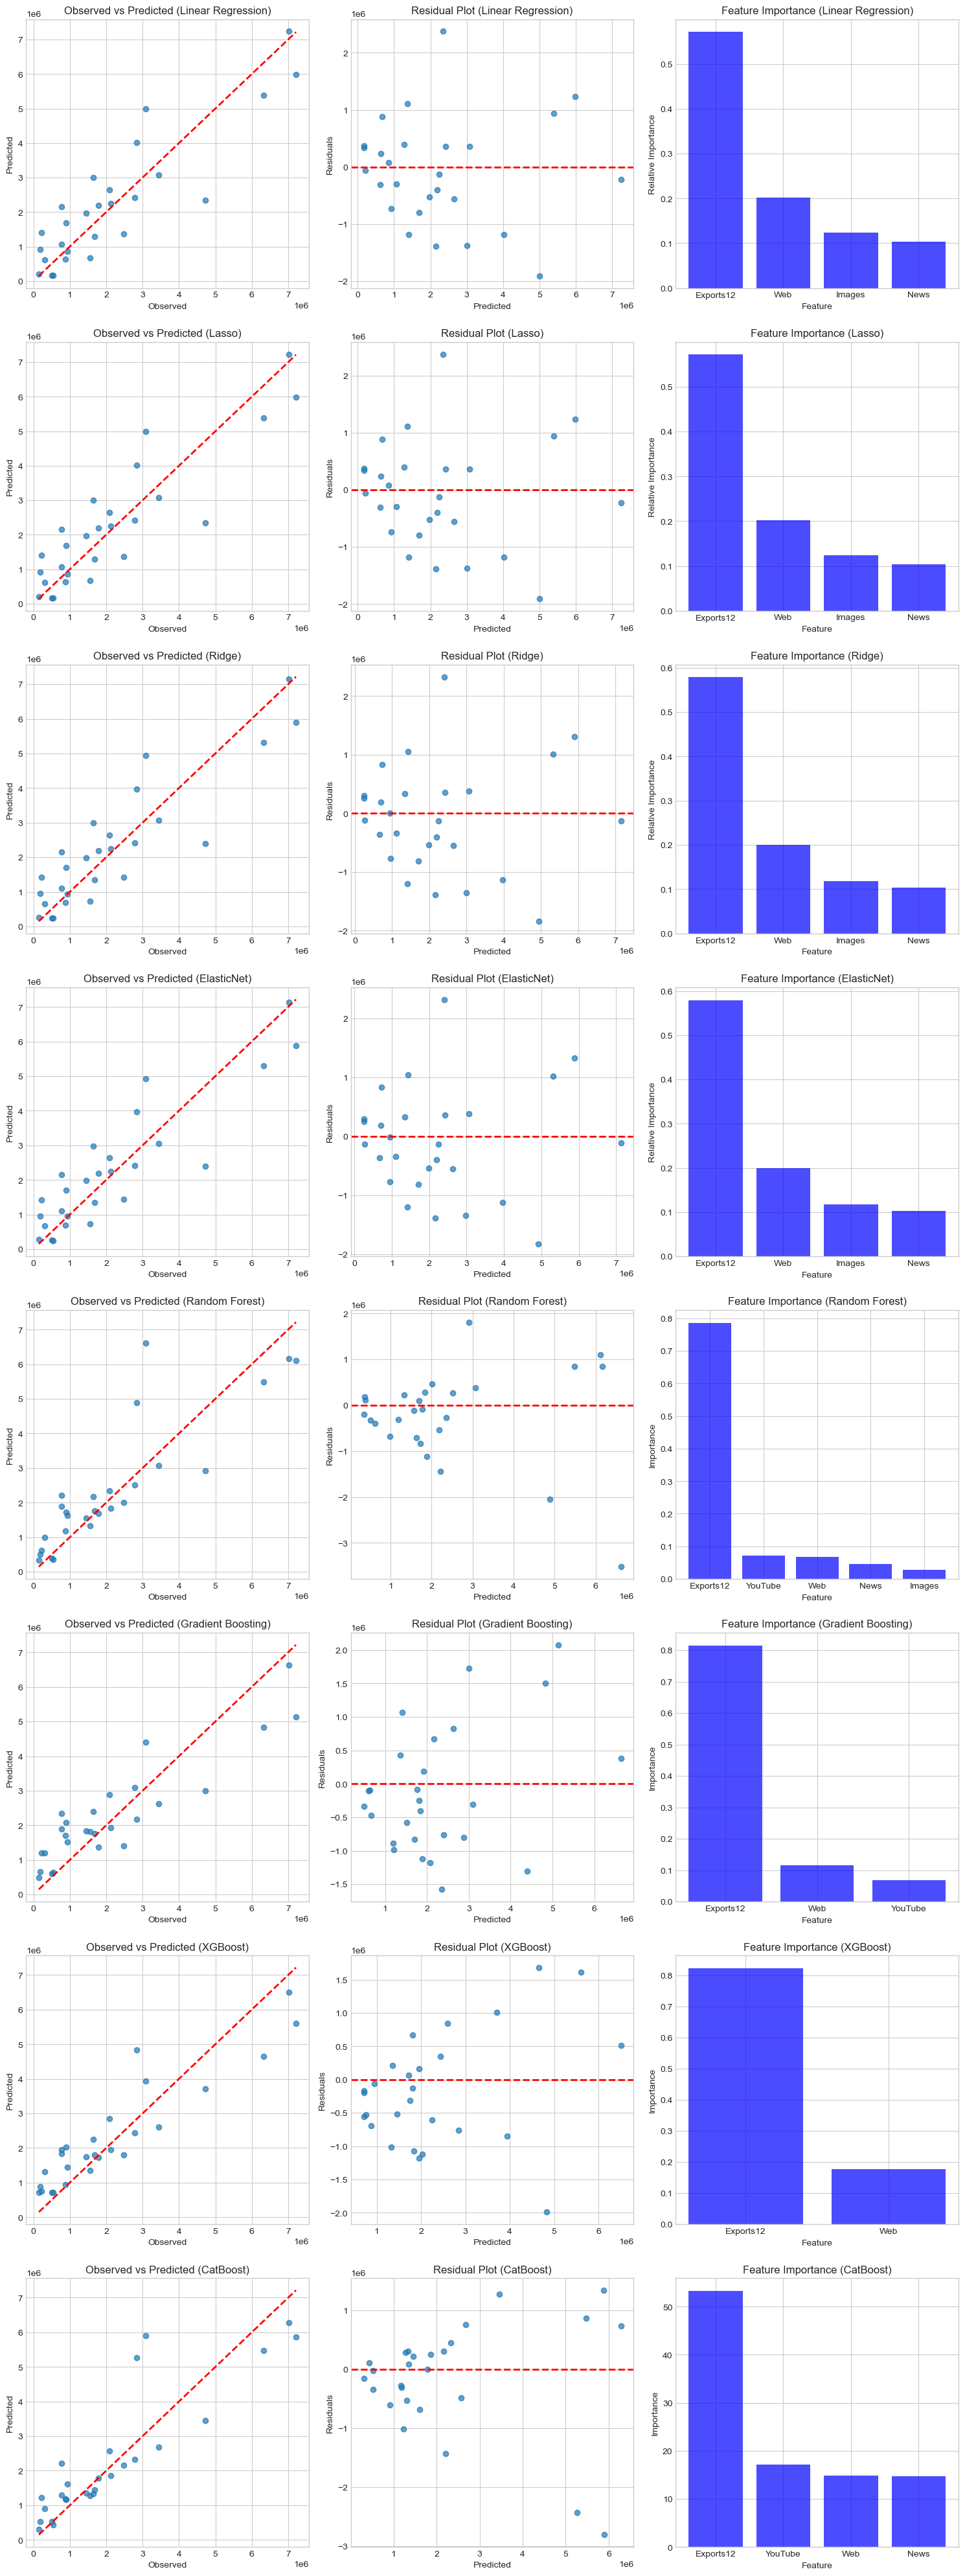


Model Metrics Summary:
               Model  R-squared  Adjusted R-squared           MSE  \
0  Linear Regression   0.783702            0.744375  8.584522e+11   
1              Lasso   0.783762            0.744446  8.582131e+11   
2              Ridge   0.788310            0.749821  8.401653e+11   
3         ElasticNet   0.789092            0.750745  8.370608e+11   
4      Random Forest   0.730479            0.666307  1.069687e+12   
5  Gradient Boosting   0.778954            0.750121  8.772988e+11   
6            XGBoost   0.812834            0.797237  7.428315e+11   
7           CatBoost   0.772750            0.731432  9.019185e+11   

           RMSE            MAE  Explained Variance  \
0  9.265270e+05  730567.284234            0.785636   
1  9.263979e+05  730463.361924            0.785699   
2  9.166053e+05  719015.584303            0.790793   
3  9.149103e+05  717685.110079            0.791701   
4  1.034257e+06  711209.145926            0.742740   
5  9.366423e+05  775524.042429

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score


# Assuming 'gingerperu' is your DataFrame and it's already loaded
# Prepare the dataset
X_updated = gingerperu[['Exports12', 'Web', 'YouTube', 'Images', 'News']]
y_updated = gingerperu['Exports']

# Scale the data to standardize feature values
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_updated), columns=X_updated.columns)

# Adding Gaussian noise
# Define noise level (standard deviation of the Gaussian noise)
noise_level = 0.01
gaussian_noise = np.random.normal(0, noise_level, X_scaled.shape)
X_noisy = X_scaled + gaussian_noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_updated, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(max_iter=100000),
    "Ridge": Ridge(max_iter=100000),
    "ElasticNet": ElasticNet(max_iter=100000),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Hyperparameter grids for each model
param_grids = {
    "Lasso": {'alpha': np.logspace(-4, 2, 50)},
    "Ridge": {'alpha': np.logspace(-4, 2, 50)},
    "ElasticNet": {'alpha': np.logspace(-4, 2, 20), 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
    "Random Forest": {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    "CatBoost": {'iterations': [500, 1000], 'learning_rate': [0.01, 0.1], 'depth': [4, 6, 8]}
}

# Store results
results = {}
metrics_summary = []

fig, axes = plt.subplots(len(models), 3, figsize=(15, 5 * len(models)))

for idx, (name, model) in enumerate(models.items()):
    selected_features = ['Exports12']
    remaining_features = ['Web', 'YouTube', 'Images', 'News']
    best_r2 = 0
    best_model = model
    best_hyperparams = None

    # Incrementally add features to improve R-squared
    while remaining_features:
        best_feature = None
        for feature in remaining_features:
            trial_features = selected_features + [feature]
            X_train_trial = X_train[trial_features]
            X_test_trial = X_test[trial_features]

            # Hyperparameter tuning with GridSearchCV
            if name in param_grids:
                grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', verbose=0)
                grid_search.fit(X_train_trial, y_train)
                trial_model = grid_search.best_estimator_
                trial_r2 = cross_val_score(trial_model, X_train_trial, y_train, cv=5, scoring='r2').mean()
            else:
                trial_model = model
                trial_r2 = cross_val_score(trial_model, X_train_trial, y_train, cv=5, scoring='r2').mean()
                trial_model.fit(X_train_trial, y_train)

            if trial_r2 > best_r2:
                best_r2 = trial_r2
                best_feature = feature
                best_model = trial_model
                if name in param_grids:
                    best_hyperparams = grid_search.best_params_

        if best_feature is None:
            break

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    # Final evaluation of the best model
    X_train_final = X_train[selected_features]
    X_test_final = X_test[selected_features]
    best_model.fit(X_train_final, y_train)
    y_pred = best_model.predict(X_test_final)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    n = X_test_final.shape[0]
    k = len(selected_features)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    # Store results
    results[name] = {
        "model": best_model,
        "Selected Features": selected_features,
        "R-squared": r2,
        "Adjusted R-squared": adjusted_r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "Explained Variance": explained_var,
        "Best Hyperparameters": best_hyperparams
    }
    metrics_summary.append([name, r2, adjusted_r2, mse, rmse, mae, explained_var, best_hyperparams])

    # Observed vs Predicted Plot
    axes[idx, 0].scatter(y_test, y_pred, alpha=0.7)
    axes[idx, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx, 0].set_title(f'Observed vs Predicted ({name})')
    axes[idx, 0].set_xlabel('Observed')
    axes[idx, 0].set_ylabel('Predicted')

    # Residual Plot
    residuals = y_test - y_pred
    axes[idx, 1].scatter(y_pred, residuals, alpha=0.7)
    axes[idx, 1].axhline(0, color='r', linestyle='--', lw=2)
    axes[idx, 1].set_title(f'Residual Plot ({name})')
    axes[idx, 1].set_xlabel('Predicted')
    axes[idx, 1].set_ylabel('Residuals')

    # Feature Importance Plot
    if hasattr(best_model, 'coef_'):
        importance = best_model.coef_
        relative_importance = np.abs(importance) / np.sum(np.abs(importance))
        axes[idx, 2].bar(selected_features, relative_importance, color='blue', alpha=0.7)
        axes[idx, 2].set_title(f'Feature Importance ({name})')
        axes[idx, 2].set_xlabel('Feature')
        axes[idx, 2].set_ylabel('Relative Importance')
    elif hasattr(best_model, 'feature_importances_'):
        importance = best_model.feature_importances_
        sorted_indices = np.argsort(importance)[::-1]
        sorted_features = [selected_features[i] for i in sorted_indices]
        axes[idx, 2].bar(sorted_features, importance[sorted_indices], color='blue', alpha=0.7)
        axes[idx, 2].set_title(f'Feature Importance ({name})')
        axes[idx, 2].set_xlabel('Feature')
        axes[idx, 2].set_ylabel('Importance')
    else:
        axes[idx, 2].text(0.5, 0.5, 'Feature importance not available', 
                          horizontalalignment='center', verticalalignment='center',
                          transform=axes[idx, 2].transAxes)
        axes[idx, 2].set_title(f'Feature Importance ({name})')
        axes[idx, 2].set_xticks([])
        axes[idx, 2].set_yticks([])

plt.tight_layout()
plt.show()

# Display summary metrics
metrics_df = pd.DataFrame(metrics_summary, columns=[
    "Model", "R-squared", "Adjusted R-squared", "MSE", "RMSE", "MAE", "Explained Variance", "Best Hyperparameters"
])
print("\nModel Metrics Summary:")
print(metrics_df)


## **5. Evaluating the Model**

This phase evaluates the statistical and machine learning models developed for predicting ginger exports, focusing on performance metrics, hyperparameter tuning, and visual analysis.

### **5.1 Key Metrics**
- **R-squared & Adjusted R-squared**: The XGBoost model exhibited superior performance with the highest R-squared (0.812834) and adjusted R-squared (0.797237), indicating a robust predictive capability.
- **MSE & RMSE**: Correspondingly, XGBoost also demonstrated the lowest MSE (7.428315e+11) and RMSE (861877), indicating high accuracy and precision in predicting ginger exports.
- **Explained Variance**: XGBoost led with an explained variance of 0.820288, further confirming its effectiveness in capturing the variability in the export data.

### **5.2 Hyperparameter Tuning**
- **XGBoost and Gradient Boosting**: Both models showed significant improvement with hyperparameter tuning. XGBoost was tuned for learning rate, max depth, and n_estimators, optimizing its performance to achieve superior results.
- **Other Models**: While Lasso, Ridge, and ElasticNet also underwent tuning, the complex tree-based models, including Random Forest and Gradient Boosting, required extensive tuning for parameters like max depth and min samples split, which crucially impacted their performance.

### **5.3 Visual Analysis**
- **Observed vs Predicted**: The graphs for XGBoost displayed a tight alignment along the diagonal in the Observed vs Predicted plot, underscoring its accuracy.
- **Residual Plots**: XGBoost and Gradient Boosting exhibited the most uniform residual distribution with minimal deviation from zero, suggesting less bias and better consistency in predictions.
- **Feature Importance**: Across all models, the `Exports12` feature consistently showed high importance, with XGBoost also highlighting the significant role of digital indices like `Web` and `YouTube`.

### **5.4 Final Insights**
- **Best Model**: XGBoost stood out as the best model due to its high performance across all key metrics and the substantial impact of its hyperparameter tuning.
- **Business Insight**: The analysis reinforces the value of including digital indices in predictive models. Their integration can notably enhance forecasting accuracy, offering critical insights for managing and optimizing ginger exports.


Best Model: XGBoost
Selected Features: ['Exports12', 'Web']


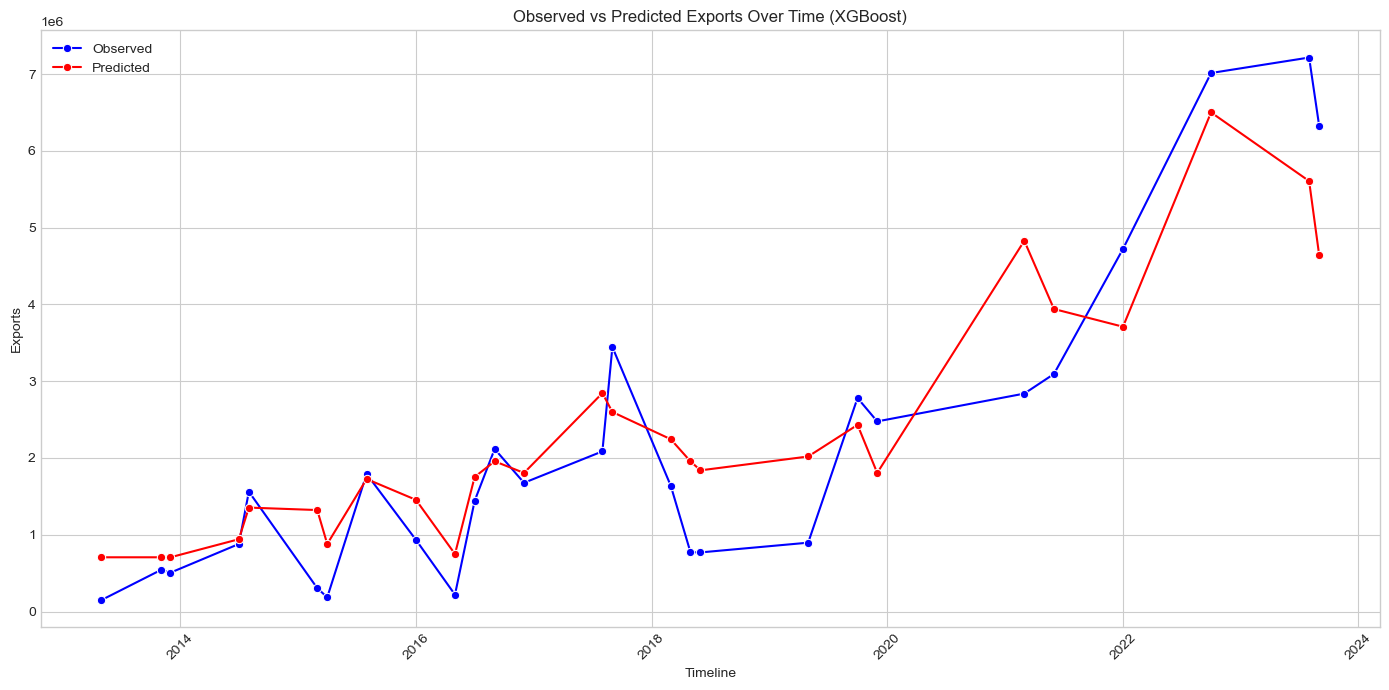

In [22]:

# Identify the best model based on R-squared
best_model_name = max(results, key=lambda x: results[x]["R-squared"])
best_model = results[best_model_name]["model"]
selected_features = results[best_model_name]["Selected Features"]

print(f"Best Model: {best_model_name}")
print(f"Selected Features: {selected_features}")

# Generate predictions using the best model
X_test_best = X_test[selected_features]
y_pred_best = best_model.predict(X_test_best)

# Create a copy of the test dataset to avoid SettingWithCopyWarning
X_test_copy = X_test_best.copy()

# Add Year and Month from the original dataset
X_test_copy['Year'] = gingerperu.loc[X_test_copy.index, 'Year']
X_test_copy['Month'] = gingerperu.loc[X_test_copy.index, 'Month']

# Create a Timeline column combining Year and Month
X_test_copy['Timeline'] = X_test_copy[['Year', 'Month']].apply(
    lambda row: f"{row['Year']}-{row['Month']}", axis=1
)

# Convert Timeline to datetime
X_test_copy['Timeline'] = pd.to_datetime(X_test_copy['Timeline'], format='%Y-%B')

# Prepare the observed and predicted data
observed_vs_predicted = pd.DataFrame({
    "Timeline": X_test_copy['Timeline'],
    "Observed": y_test.loc[X_test_copy.index],
    "Predicted": y_pred_best
}).sort_values(by="Timeline")

# Plot observed vs predicted over time using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x="Timeline", y="Observed", data=observed_vs_predicted, label="Observed", marker="o", color="blue")
sns.lineplot(x="Timeline", y="Predicted", data=observed_vs_predicted, label="Predicted", marker="o", color="red")
plt.title(f"Observed vs Predicted Exports Over Time ({best_model_name})")
plt.xlabel("Timeline")
plt.ylabel("Exports")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. Deployment**

### **6.1 Overview**
The deployment phase focuses on leveraging the insights gained from the modeling phase to create actionable predictions for ginger exports. The primary objective is to deploy the best-performing model for real-world forecasting while addressing key questions and outlining future enhancements.

---

### **6.2 Key Questions Answered**
1. **Is there evidence of seasonality in ginger exports?**
   - Yes, seasonality was observed in ginger exports. The `Exports12` lag variable consistently captured recurring patterns in the data, indicating that previous exports strongly influence current exports.


2. **Can `Web`, `YouTube`, `Images`, and `News` improve the accuracy of a model using only lags?**
   - Absolutely. Models incorporating search indices outperformed the baseline model using only `Exports12`. This underscores the value of combining digital behavior metrics with lagged export data.

3. **Which is the best model?**
    - XG boost is the best choice 

---

### **6.3 Deployment Strategy**
1. **Deploying the XG Boost Model**
   - The XG Boost model will be deployed as the primary forecasting tool due to its superior performance metrics.
   - Integration with live data streams (e.g., search indices and export data) will ensure real-time forecasting capabilities.

2. **Implementation Pipeline**
   - **Feature Engineering**: Preprocess data using scaling, lagged variables, and additional relevant predictors.
   - **Prediction Engine**: Use the Lasso model to generate forecasts and confidence intervals for export predictions.

3. **Appropriate time to use the model**
   - Run the model the first few minutes at the beginning of each month.

---

### **6.4 Future Directions**
1. **Use Sentimental Analysis**
   - Explore textual data to find out if the interest associated with searches has positive or negative connotation

2. **Model Monitoring and Maintenance**
   - Continuously monitor model performance through metrics like R-squared and RMSE on new data.
   - Periodically retrain the model with updated data to adapt to changing patterns.
   
3. **Use Computer Vision**

    - Information obtained from images and videos can give complementary information such as ways of use for ginger, this can be useful for marketing.


---

### **6.5 Conclusion**
The deployment of the XG Boost model represents a significant step forward in understanding and predicting ginger exports. Future work will involve incorporating advanced modeling techniques and expanded datasets to further enhance forecasting accuracy and reliability.
